# Importando as bibliotecas...

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import sympy as sp
import inspect
from numpy import cos, sin, exp
import pandas as pd
import Funcoes.solucao_de_equacoes_de_uma_variavel as sl

# Capítulo 3 - Solução de equações de uma variável

### Existência e unicidade

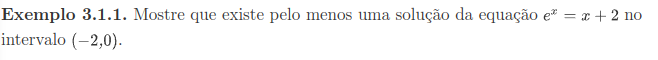

In [16]:
#de acordo com o teorema de Bolzano, existe sim, pois f(x) é função contínua tal que f(a)*f(b) < 0.
sl.f(-2), sl.f(0)

(0.1353352832366128, -1.0)

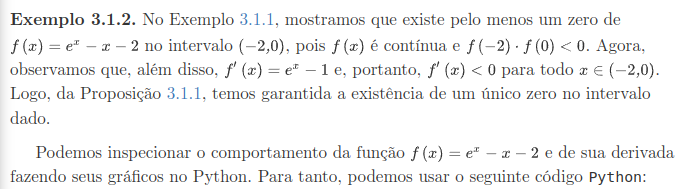

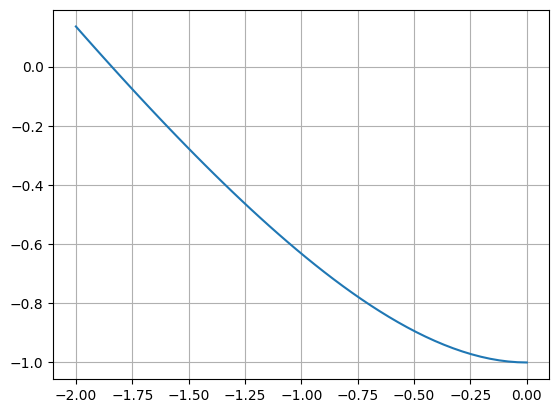

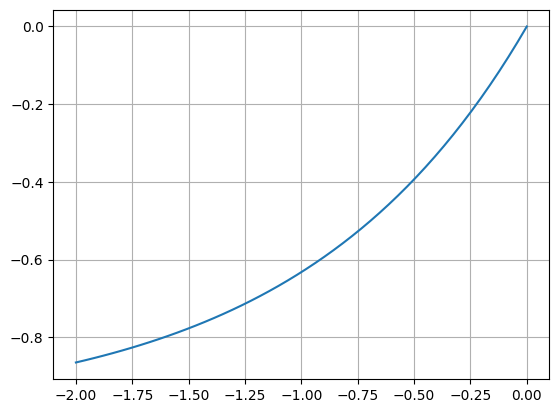

In [17]:
xx = np.linspace(-2, 0)
plt.plot(xx,sl.f(xx))
plt.grid(); plt.show()

plt.plot(xx, sl.fl(xx))
plt.grid(); plt.show()

#### Exercícios

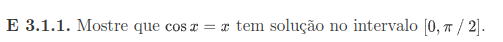

In [18]:
f1 = lambda x : sp.cos(x) - x

'''de acordo com o teorema de Bolzano, existe sim, pois f(x) é função contínua tal que f(a)*f(b) < 0.'''
f1(0), f1(mt.pi)

(1, -4.14159265358979)

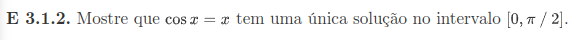

In [19]:
'''Para garantirmos que exista um único zero de uma dada função diferenciável em
um intervalo, é suficiente que ela troque de sinal e seja monótona neste intervalo.
Dessa forma, faremos o mesmo processo acima, só que agora com a derivada da função'''

x = sp.Symbol('x')
y = str(inspect.getsourcelines(f1)[0]).split(':')[1].split('\\n')[0]

aux = sp.diff(eval(y))

deriv = lambda x : eval(str(aux))
deriv(2)

#deriv(2)
#derivada.subs({x: 0}), derivada.subs({x: mt.pi/2})

-1.9092974268256817

In [20]:
data = sl.funcEmIntervalo(deriv)

dataf = pd.DataFrame(data)

dataf

alt.Chart(dataf).mark_point().encode(
    x='x',
    y='y'
)
 


alt.Chart(...)

### Método da bisseção

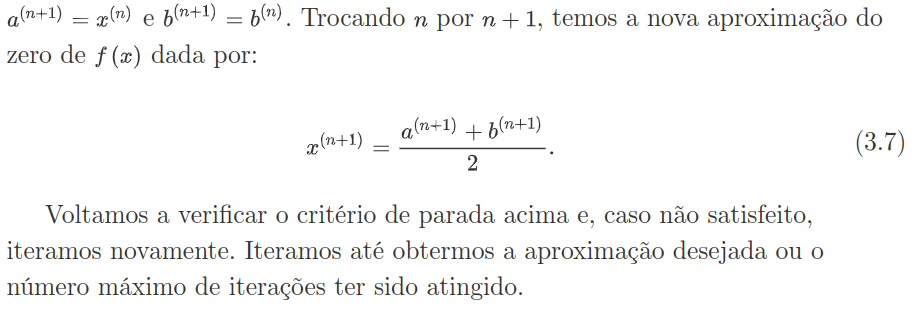

In [21]:
#Método da bisseção
sl.bissecao("x + 2 - exp(x)", -3, 2)


0:
- x: -0.5
a: -3 
b: -0.5

1:
- x: -1.75
a: -3 
b: -1.75

2:
- x: -2.375
a: -2.375 
b: -1.75

3:
- x: -2.0625
a: -2.0625 
b: -1.75

4:
- x: -1.90625
a: -1.90625 
b: -1.75

5:
- x: -1.828125
a: -1.90625 
b: -1.828125

6:
- x: -1.8671875
a: -1.8671875 
b: -1.828125

7:
- x: -1.84765625
a: -1.84765625 
b: -1.828125

8:
- x: -1.837890625
a: -1.84765625 
b: -1.837890625

9:
- x: -1.8427734375
a: -1.8427734375 
b: -1.837890625

10:
- x: -1.84033203125
a: -1.8427734375 
b: -1.84033203125

11:
- x: -1.841552734375
a: -1.841552734375 
b: -1.84033203125

12:
- x: -1.8409423828125
a: -1.841552734375 
b: -1.8409423828125

13:
- x: -1.84124755859375
a: -1.841552734375 
b: -1.84124755859375


Resultado:-1.841400146484375; f(x): 0.0


### Método da iteração de ponto fixo
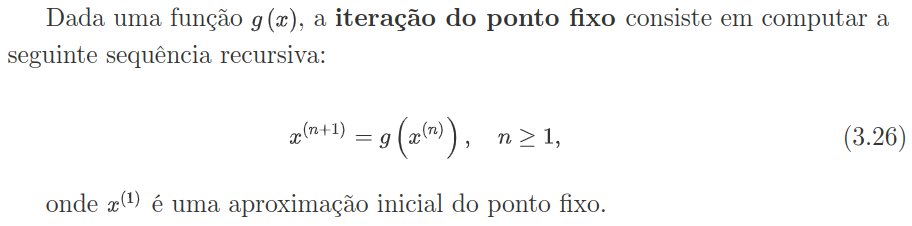

In [22]:
sl.pontoFixo("x*exp(x)-10","x - a * f(x)")


0: 1.7

1: 1.734714471703188

2: 1.7431562904977917

3: 1.745018500264169

4: 1.7454190573629884

5: 1.7455047306829847

6: 1.7455230326156317

7: 1.7455269413387424


Resultado:1.7455277760737569; f(x): -0.0


### Método de Newton-Raphson
* usado para calcular o zero de funções reais de uma variável real.
* **Taxa de convergência:** dada em função do valor absoluto da derivada de g(x).

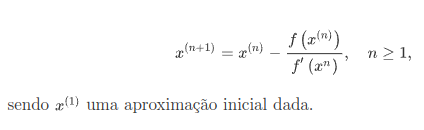

In [23]:
sl.newtonRaphson("x * exp(x)-10")


0: 2.339397205857212

1: 1.9274845442741921

2: 1.7661355029272632

3: 1.7458146018742546

4: 1.7455280587605897

5: 1.7455280027407014


Resultado:1.7455280027407014; x0:1.7455280587605897


### Método da secante
* o método das secantes é uma variação do método de Newton, evitando a necessidade de conhecer-se a derivada analítica de f(x). Dada uma função f(x), a ideia é aproximar sua derivada pela razão fundamental:
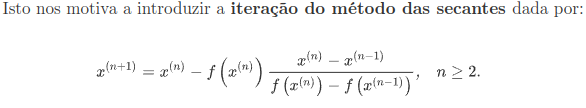

In [24]:
sl.secante("x * exp(x)-10")  


0: 1.6037993859362942

1: 1.8365694431579342

2: 1.691751387438763

3: 1.7789947380029922

4: 1.7253453912672916

5: 1.7579370638686969

6: 1.737987524108427

7: 1.750143107793924

8: 1.7427157033515246

9: 1.7472463230550104

10: 1.7444798187610697

11: 1.7461680380768303

12: 1.7451374262230757

13: 1.7457664375329731

14: 1.7453824787260706

15: 1.7456168327705286

16: 1.7454737841449617

17: 1.745561097491388

18: 1.7455078025115884

19: 1.7455403327049943

20: 1.7455204767747208

21: 1.7455325964741364

22: 1.7455251988089822


Resultado:1.7455251988089822
 x0:1.7455325964741364



### Critério de parada
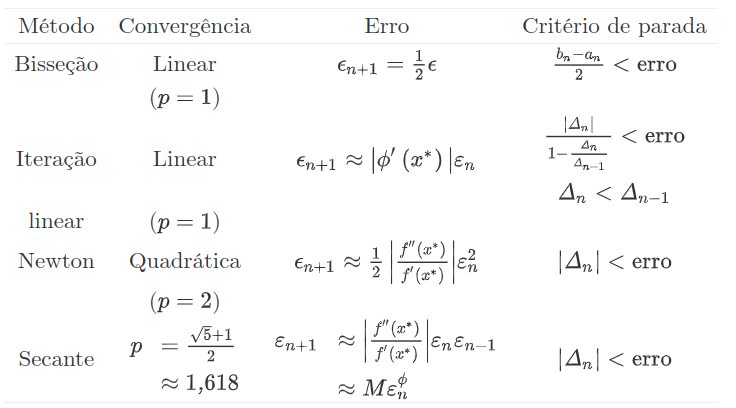

O erro na tabela sempre se refere ao erro absoluto esperado. Nos três últimos métodos, é comum que se exija como critério de parada que a condição seja satisfeita por alguns poucos passos consecutivos.